# SH Persona User Survey

## June 2020
by Jo for the Team

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

## Importing, cleaning and wrangling

In [36]:
# Import data with a context manager
col_drop = ['#', 'email', 'Start Date (UTC)', 'Submit Date (UTC)', 'Network ID' ]

with open("_Input/PersonaUserSurvey_20-06-08_responses(ENG).csv") as fp:
    df_ENG = pd.read_csv(fp)
    df_ENG.drop(columns= col_drop, inplace= True)
    
with open("_Input/PersonaUserSurvey_20-06-08_responses(DE).csv") as fp:
    df_DE = pd.read_csv(fp)
    df_DE.drop(columns= col_drop, inplace= True)

with open("_Input/PersonaUserSurvey_20-06-08_responses(FR).csv") as fp:
    df_FR = pd.read_csv(fp)
    df_FR.drop(columns= col_drop, inplace= True)

In [37]:
# Quick check if numbers of rows and columns are as expected
lang_df = [df_ENG, df_DE, df_FR]
for i in lang_df:
    print(i.shape)

(1044, 80)
(209, 80)
(249, 80)


In [24]:
# Create a list of all df columns
col= list(df_ENG.columns)
# Create a list of "Other" columns indexes
col_othern = [col.index(i) for i in ['Other', 'Other.1', 'Other.3'] ] # Forgot Other.2. It already contains "Other" and nan as unique answers

# Replace all answers in "Other"s columns by a generic "Other" string
for i in col_othern:
    u = list(df_ENG.iloc[:, i].unique())
    u.remove(np.nan)
    df_ENG.iloc[:, i].replace(to_replace= u, value= 'Other', inplace= True)
    
# Create a list of all df columns
col= list(df_FR.columns)
# Create a list of "Other" columns indexes
col_othern = [col.index(i) for i in ['Other', 'Other.1', 'Other.2', 'Autre'] ]

# Replace all answers in "Other"s columns by a generic "Other" string
for i in col_othern:
    u = list(df_FR.iloc[:, i].unique())
    u.remove(np.nan)
    df_FR.iloc[:, i].replace(to_replace= u, value= 'Other', inplace= True)
    
# Create a list of all df columns
col= list(df_DE.columns)
# Create a list of "Other" columns indexes
col_othern = [col.index(i) for i in ['Other', 'Other.1', 'Andere'] ] # Forgot 'Other.2'. It only contains nan

# Replace all answers in "Other"s columns by a generic "Other" string
for i in col_othern:
    u = list(df_DE.iloc[:, i].unique())
    u.remove(np.nan)
    df_DE.iloc[:, i].replace(to_replace= u, value= 'Other', inplace= True)

In [ ]:
# Correspondance table of questions in all languages
# As reference only.
# Not necessary for further process below.
df_Qcol_LANG= pd.DataFrame({'ENG': df_ENG.columns, 'DE': df_DE.columns, 'FR': df_FR.columns} )

In [38]:
# Change columns names (Questions) from original language to english
list_df = [df_DE, df_FR]
for i in list_df:
    i.columns= list(df_ENG.columns)

In [39]:
# Add column to id original survey language
df_ENG['Original_Lang'] = 'ENG'
df_DE['Original_Lang'] = 'DE'
df_FR['Original_Lang'] = 'FR'

In [40]:
# Import the Answer Translator look up table (made here: https://docs.google.com/spreadsheets/d/14D_NotYtMToC352D4-vA_Mn4J2bS83lZ7WOGIezYP4c/edit#gid=1663394845)
# into one master lookup table
df_Answer_translator = pd.read_csv('_Input/Survey-results-CSV-05-06 - LanguageConversionTable.csv')

# Make lists of unique answer from columns of lookup table (input to .replace method)
EN_unique = list(df_Answer_translator['EN long'])
FR_unique = list(df_Answer_translator['FR'])
DE_unique = list(df_Answer_translator['DE'])

# Swap original language answer for english translation
df_FR.replace(to_replace= FR_unique, value= EN_unique, inplace= True)
df_DE.replace(to_replace= DE_unique, value= EN_unique, inplace= True)

In [41]:
# Stitch all DataFrame together
df= pd.concat([df_ENG, df_FR, df_DE])
df.reset_index(drop= True)

,How old are you?,What's your gender?,Do you use Android or iOS?,What’s your annual income level?,How would you describe your cycling skills?,How many bike trips do you make on average per week?,Road bike,Mountain bike,Hybrid bike,Bike share bike,...,Social media,Amazon/e-commerce websites,Chats with friends or family,Retail stores/shops,Specialized blogs/influencers,Brand websites,Other.3,Would you be interested in giving us more feedback in the future?,Thanks! What's your email address?,Original_Lang
0,35-44,Male,Android,"36,000 - 54,999",3,1,NaN,NaN,NaN,NaN,...,Social media,NaN,Chats with friends or family,Retail stores/shops,Specialized blogs/influencers,Brand websites,NaN,1,muellmuetze@gmx.de,ENG
1,35-44,Male,Android,"72,000 or more",10,5,NaN,NaN,Hybrid bike,NaN,...,Social media,Amazon/e-commerce websites,NaN,NaN,NaN,NaN,NaN,1,michl.koch@gmail.com,ENG
2,25-34,Female,iOS,"72,000 or more",7,3,NaN,NaN,Hybrid bike,NaN,...,NaN,NaN,Chats with friends or family,Retail stores/shops,NaN,NaN,NaN,1,JennRhodes.13@gmail.com,ENG
3,35-44,Male,iOS,"72,000 or more",8,15,NaN,NaN,NaN,NaN,...,NaN,NaN,Chats with friends or family,Retail stores/shops,NaN,Brand websites,NaN,0,NaN,ENG
4,35-44,Male,iOS,"22,000 - 35,999",8,10,NaN,Mountain bike,Hybrid bike,NaN,...,Social media,Amazon/e-commerce websites,NaN,Retail stores/shops,NaN,NaN,NaN,1,xrosee@live.cn,ENG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,25-34,Male,iOS,"22,000 - 35,999",7,2,NaN,NaN,NaN,NaN,...,NaN,Amazon/e-commerce websites,Chats with friends or family,Retail stores/shops,NaN,NaN,NaN,1,luteo@web.de,DE
1498,25-34,Male,iOS,"36,000 - 54,999",8,12,NaN,NaN,Hybrid bike,NaN,...,NaN,Amazon/e-commerce websites,NaN,NaN,Specialized blogs/influencers,NaN,NaN,1,info@patrickscheips.de,DE
1499,45-54,Male,iOS,Prefer not to say,6,3,NaN,NaN,NaN,NaN,...,NaN,Amazon/e-commerce websites,NaN,NaN,NaN,Brand websites,NaN,0,NaN,DE
1500,25-34,Male,Android,Prefer not to say,8,3,NaN,NaN,Hybrid bike,NaN,...,NaN,NaN,Chats with friends or family,NaN,NaN,NaN,NaN,0,NaN,DE


In [31]:
# Export compounded DataFrame to repo
df.to_pickle('PUS_20-06-08_responses(Compounded).pkl')

In [45]:
# convert to categorical data in the df
catcol = [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80]
for col in catcol:
    df.iloc[:, col] = df.iloc[:, col].astype('category')

# Assuming respondent who did not answer never used their SH, thus value = 0
df.iloc[:, 62].replace(to_replace= np.nan, value= 0, inplace= True)    
    
uint8col = [4, 5, 18, 19, 20, 21, 22, 23, 24, 25, 26, 62, 64, 65, 66, 67, 68, 69 ] 
for col in uint8col:
    df.iloc[:, col] = df.iloc[:, col].astype('uint8') # uint8 = 8 bits positive integers

0      5
1      4
2      3
3      2
4      1
      ..
204    1
205    5
206    5
207    0
208    3
Name: On a scale from 1 to 5, 1 being "Never" and 5 being "Every Ride", how often have you connected to your SmartHalo over the past year? , Length: 1502, dtype: int32

In [70]:
col = ["age", 
      "gender", 
      "platform", 
      "income", 
      "experience", 
      "rides_per_week",
      "bike_type_Road",
      "bike_type_Mountain",
      "bike_type_Hybrid",
      "bike_type_BikeShare",
      "bike_type_eBike",
      "bike_type_CruiserCity",
      "bike_type_Cargo",
      "bike_type_SingleSpeed",
      "bike_type_Folding",
      "bike_cost",
      "location",
      "environment",
      "activity_Commuting",
      "activity_Chores/errands",
      "activity_WorkingTool",
      "activity_elseTransportation",
      "activity_Mountain",
      "activity_Touring",
      "activity_Racing",
      "activity_FitnessTraining",
      "activity_PleasureRides",
      "because_isConvient",
      "because_isReliable",
      "because_isFaster",
      "because_isCheaper",
      "because_reduceEnvImpact",
      "because_beHealthy",
      "because_likeFamily/Friends",
       "because_isHobby/Interest",
      "because_isMyIdentity/Culture",
      "because_isFun",
      "because_Other",
      "NOTbecause_Weather",
      "NOTbecause_Far/Steep",
      "NOTbecause_meNotKnowTheWay",
      "NOTbecause_meLoadCarrying",
      "NOTbecause_meSweat",
      "NOTbecause_meUnsafe",
      "NOTbecause_bikeUnsafe",
      "NOTbecause_meLazy",
      "NOTbecause_notFun",
      "NOTbecause_Darkness",
      "NOTbecause_Other",
      "condition_Temparate",
      "condition_Hot/Humid",
      "condition_Rain",
      "condition_Snow/Ice",
      'SH_versions',
      "reason_helpNavigate",
      "reason_helpTrackFitnessGoals",
      "reason_helpTrackEnvGoals",
      "reason_helpMeSafe",
      "reason_helpBikeSafe",
      "reason_NoPhoneRide",
      "reason_isCool",
      "reason_Other",
      "SH_usage",
      "SH_crowdfunded",
      "buyingREF_Brand",
      "buyingREF_OnlineReviews",
      "buyingREF_Influencer",
      "buyingREF_Friend/family",
      "buyingREF_Price",
      "buyingREF_myNeeds",
      "infoFROM_OnlineForums",
      "infoFROM_SocialMedias",
      "infoFROM_Amazon/eCommerceSite",
      "infoFROM_Friend/family",
      "infoFROM_Shop/Store",
      "infoFROM_Influencers/Blogs",
      "infoFROM_Brand",
      "infoFROM_Other",
      "more_help",
      "email",
      "Original_Lang"
     ]


In [73]:
# Replacing full question sentence as columns name with shorter names
df.columns = col

In [ ]:
# Dropping people who answered twice and keeping the first answer.
# FYI there was 2 duplicates. I check both and first answer was in original language.
df.drop_duplicates(subset= 'email', inplace= True, keep= 'first')
# Confirming there's a single entry by email.
df['email'].value_counts()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 208
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            1502 non-null   category
 1   gender                         1502 non-null   category
 2   platform                       1502 non-null   category
 3   income                         1502 non-null   category
 4   experience                     1502 non-null   uint8   
 5   rides_per_week                 1502 non-null   uint8   
 6   bike_type_Road                 434 non-null    category
 7   bike_type_Mountain             244 non-null    category
 8   bike_type_Hybrid               497 non-null    category
 9   bike_type_BikeShare            24 non-null     category
 10  bike_type_eBike                257 non-null    category
 11  bike_type_CruiserCity          148 non-null    category
 12  bike_type_Cargo                26 n

In [112]:
# Saving to pickle (dedicated format to save DataFrames)
# df.to_pickle('PUS_20-06-08_responses(Compounded).pkl' )

## EDA (Exploratory data analysis)

In [ ]:
# Short cut all above cells by loading the DataFrame from here.
df = pd.read_pickle('PUS_20-06-08_responses(Compounded).pkl')

### Plotting all categorical data

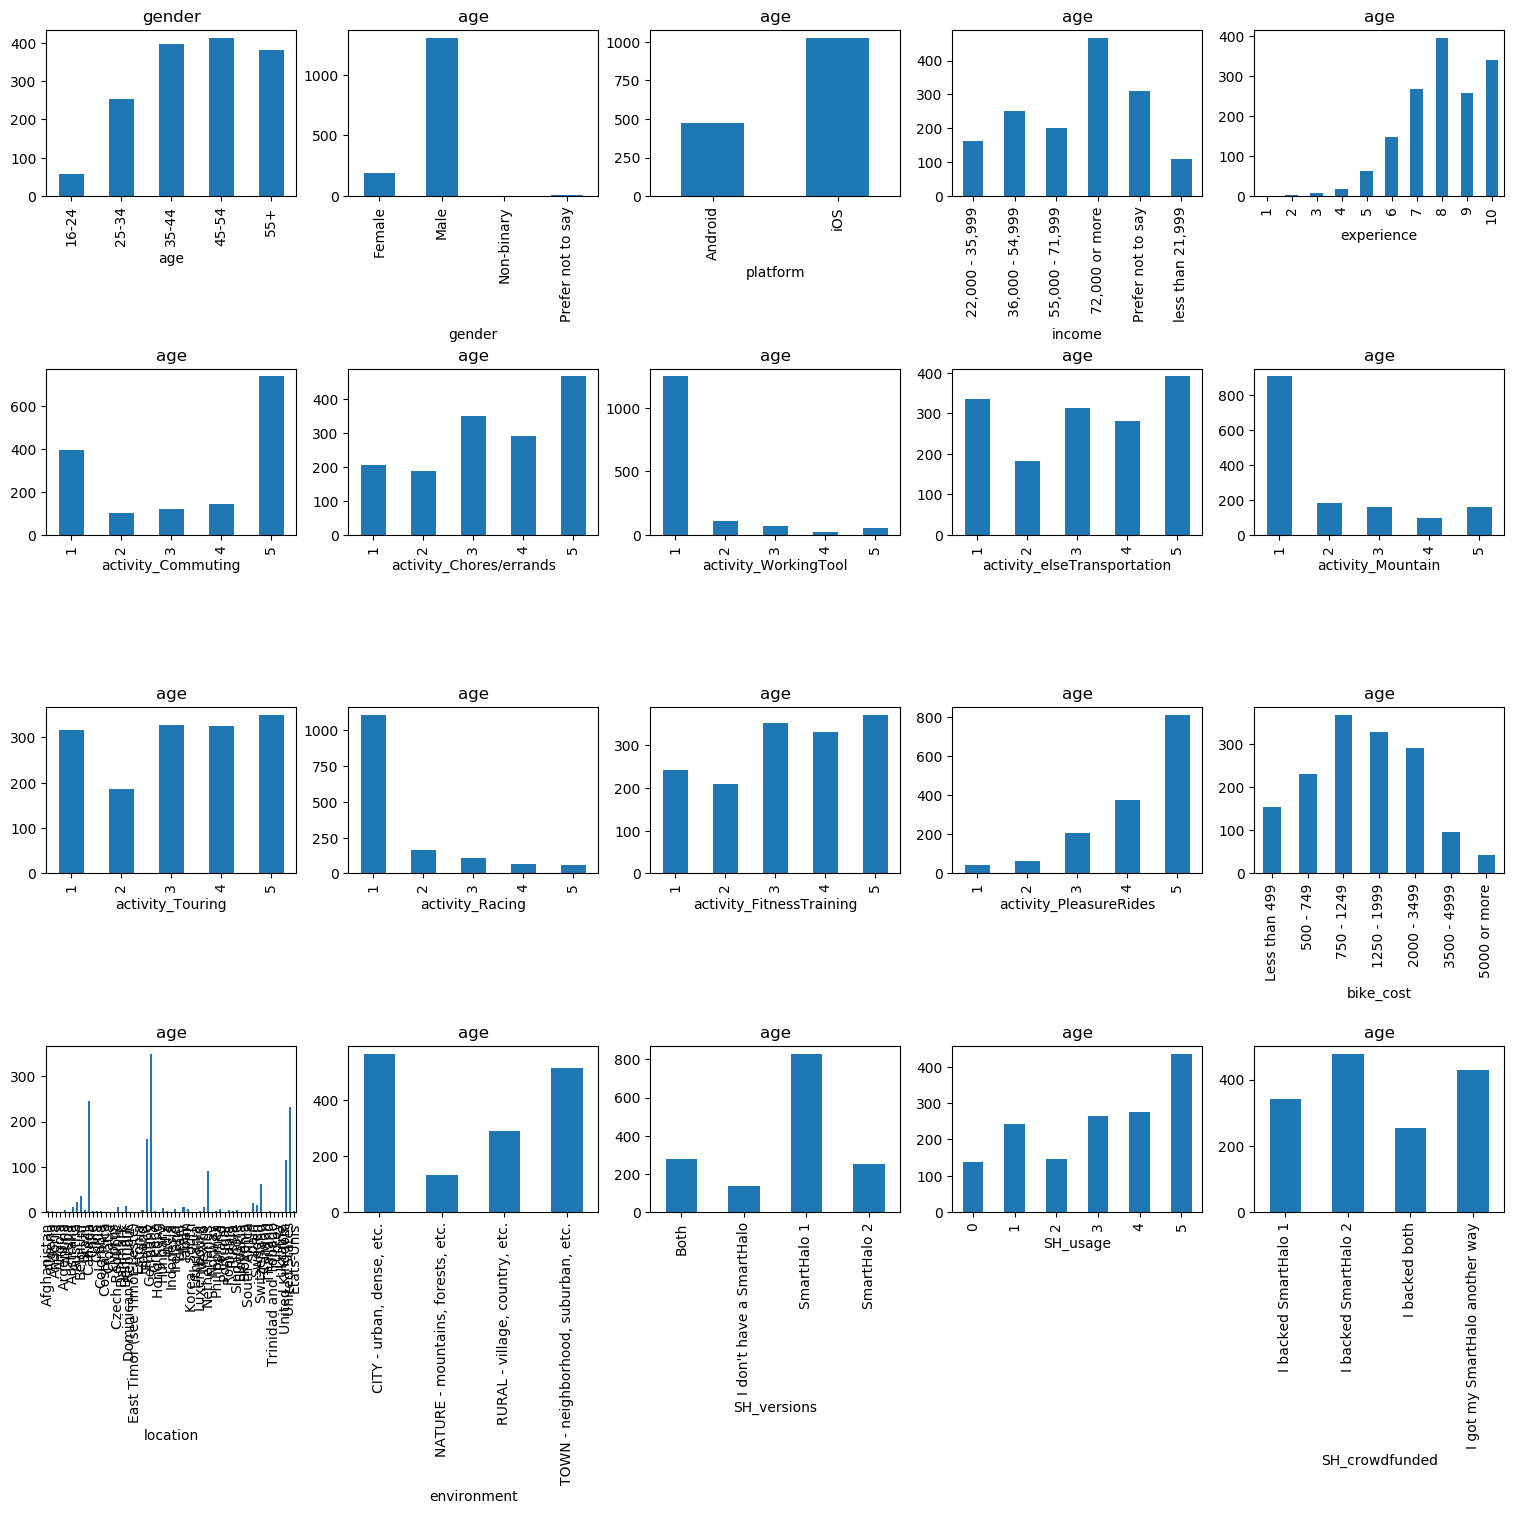

In [167]:
# Generate a matrix descriptive histogram by copy/pasting output from previous cell
# Add .reindex() method by hand where x axis order in not what it should be

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15), squeeze=False)
df.groupby('age').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 0)])
df.groupby('gender').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 1)])
df.groupby('platform').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 2)])
df.groupby('income').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 3)])
df.groupby('experience').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(0, 4)])

#rpw = ['Less than once a week', '1-2 times a week', '3 or more times a week']
df.groupby('activity_Commuting').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 0)])
df.groupby('activity_Chores/errands').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 1)])
df.groupby('activity_WorkingTool').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 2)])
df.groupby('activity_elseTransportation').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 3)])
df.groupby('activity_Mountain').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(1, 4)])
df.groupby('activity_Touring').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 0)])
df.groupby('activity_Racing').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 1)])
df.groupby('activity_FitnessTraining').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 2)])
df.groupby('activity_PleasureRides').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(2, 3)])
bc = ['Less than 499', '500 - 749', '750 - 1249','1250 - 1999', '2000 - 3499', '3500 - 4999', '5000 or more']
df.groupby('bike_cost').count().iloc[:,0].reindex(bc).plot(kind="bar", subplots=True, ax=axes[(2, 4)])

df.groupby('location').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(3, 0)])
df.groupby('environment').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(3, 1)])
df.groupby('SH_versions').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(3, 2)])
df.groupby('SH_usage').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(3, 3)])
df.groupby('SH_crowdfunded').count().iloc[:,0].plot(kind="bar", subplots=True, ax=axes[(3, 4)])

plt.tight_layout(pad=0.2, w_pad=0.5, h_pad=0.5)
plt.show()
#plt.savefig('Categorical plot matrix.pdf')

### Top 10 location of respondants

In [155]:
# Id the top 10 location of respondants
location = df['location'].value_counts(normalize= True)
location.head(10)

Germany           0.233023
Canada            0.163116
United States     0.155126
France            0.107190
United Kingdom    0.075899
Netherlands       0.059920
Switzerland       0.041278
Belgium           0.023302
Austria           0.014647
Spain             0.012650
Name: location, dtype: float64

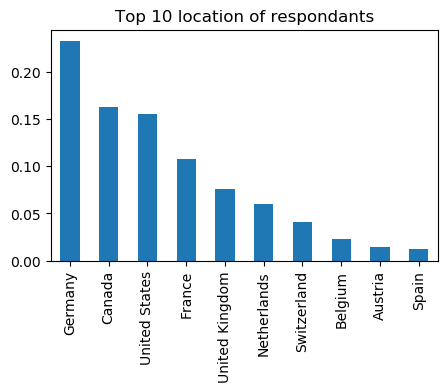

In [163]:
_= location.iloc[0:10].plot(kind= 'bar', figsize= [5,3])
plt.title('Top 10 location of respondants')
plt.show()

### Plotting all numerical data

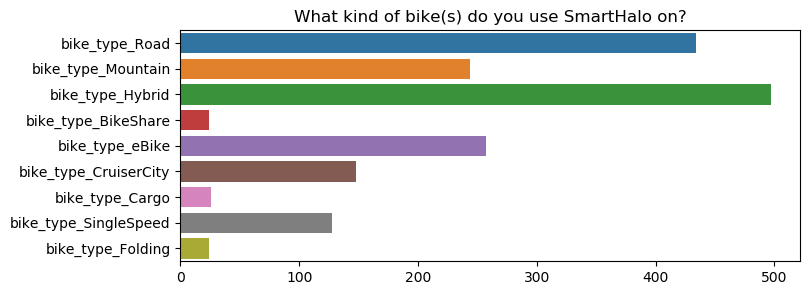

In [143]:
# Create list of column index number corresponding to the "What kind of bike" question
ls_bike = np.arange(6, 15, 1)
# Create list of sums of positive answer for each category
ls_bike_counts = [df.iloc[:, i].value_counts()[0] for i in ls_bike]
# Extracting the name of each category
ls_bike_key = list(df.columns[ls_bike])

# Plot the results
fig = plt.figure(figsize=[8,3])
_ = sns.barplot(y= ls_bike_key, x= ls_bike_counts, figure= fig)
plt.title('What kind of bike(s) do you use SmartHalo on?')
plt.show()

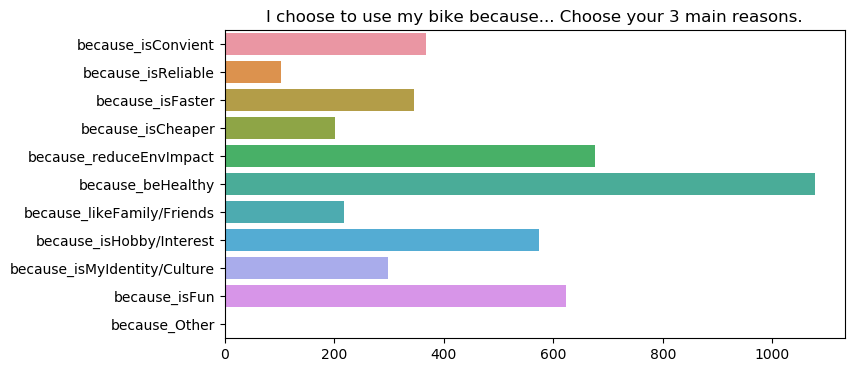

In [125]:
# Create list of column index number corresponding to the "What kind of bike" question
ls_because = np.arange(27, 38, 1)
# Create list of sums of positive answer for each category
ls_because_counts = [df.iloc[:, i].value_counts()[0] for i in ls_because]
# Extracting the name of each category
ls_because_key = list(df.columns[ls_because])

# Plot the results
fig = plt.figure(figsize=[8,4])
_ = sns.barplot(y= ls_because_key, x= ls_because_counts, figure= fig)
plt.title('I choose to use my bike because... Choose your 3 main reasons.')
plt.show()

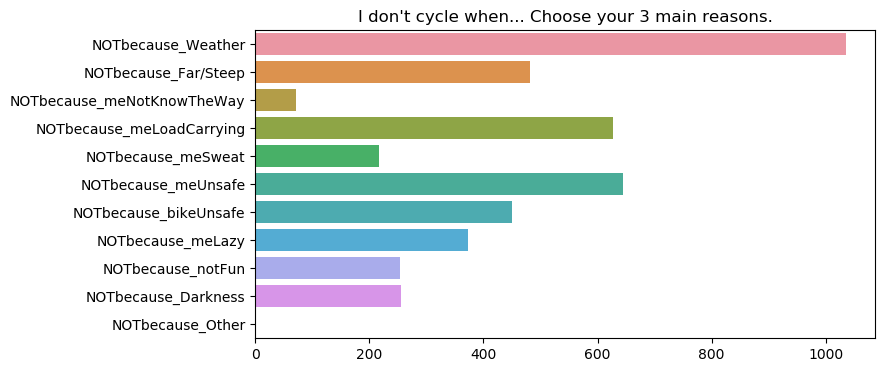

In [140]:
# Create list of column index number corresponding to the "What kind of bike" question
ls_NOTbecause = np.arange(38, 49, 1)
# Create list of sums of positive answer for each category
ls_NOTbecause_counts = [df.iloc[:, i].value_counts()[0] for i in ls_NOTbecause]
# Extracting the name of each category
ls_NOTbecause_key = list(df.columns[ls_NOTbecause])

# Plot the results
fig = plt.figure(figsize=[8,4])
_ = sns.barplot(y= ls_NOTbecause_key, x= ls_NOTbecause_counts, figure= fig)
plt.title("I don't cycle when... Choose your 3 main reasons.")
plt.show()

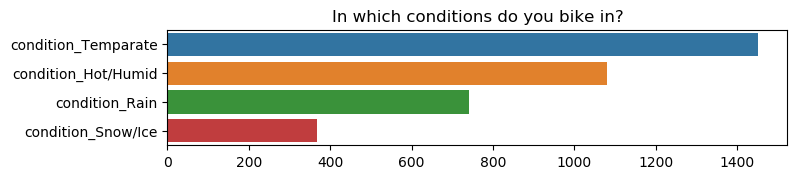

In [142]:
# Create list of column index number corresponding to the "What kind of bike" question
ls_condition = np.arange(49, 53, 1)
# Create list of sums of positive answer for each category
ls_condition_counts = [df.iloc[:, i].value_counts()[0] for i in ls_condition]
# Extracting the name of each category
ls_condition_key = list(df.columns[ls_condition])

# Plot the results
fig = plt.figure(figsize=[8, 1.5])
_ = sns.barplot(y= ls_condition_key, x= ls_condition_counts, figure= fig)
plt.title('In which conditions do you bike in?')
plt.show()

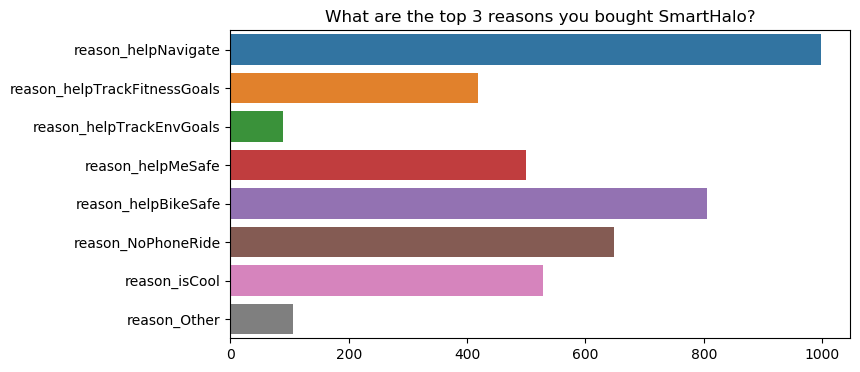

In [138]:
# Create list of column index number corresponding to the "What kind of bike" question
ls_reason = np.arange(54, 62, 1)
# Create list of sums of positive answer for each category
ls_reason_counts = [df.iloc[:, i].value_counts()[0] for i in ls_reason]
# Extracting the name of each category
ls_reason_key = list(df.columns[ls_reason])

# Plot the results
fig = plt.figure(figsize=[8,4])
_ = sns.barplot(y= ls_reason_key, x= ls_reason_counts, figure= fig)
plt.title('What are the top 3 reasons you bought SmartHalo?')
plt.show()

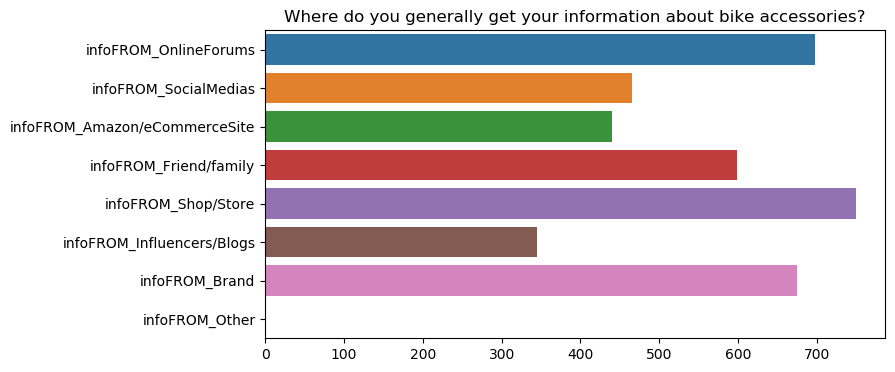

In [137]:
# Create list of column index number corresponding to the "What kind of bike" question
ls_infoFROM = np.arange(70, 78, 1)
# Create list of sums of positive answer for each category
ls_infoFROM_counts = [df.iloc[:, i].value_counts()[0] for i in ls_infoFROM]
# Extracting the name of each category
ls_infoFROM_key = list(df.columns[ls_infoFROM])

# Plot the results
fig = plt.figure(figsize=[8,4])
_ = sns.barplot(y= ls_infoFROM_key, x= ls_infoFROM_counts, figure= fig)
plt.title('Where do you generally get your information about bike accessories?')
plt.show()

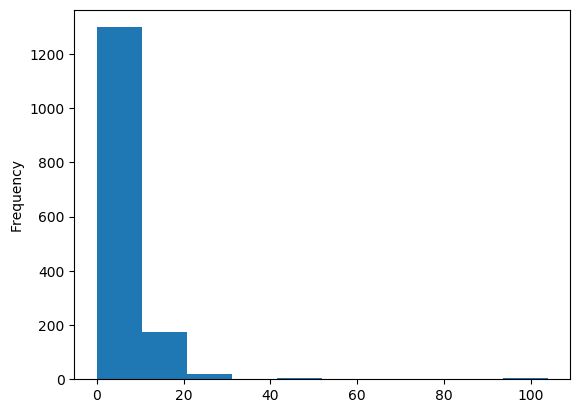

In [172]:
_ = df['rides_per_week'].plot.hist(bins= 10)
plt.show()

In [177]:
df['rides_per_week'].value_counts()

3      237
5      209
2      207
10     157
4      143
1      116
6       96
7       81
12      49
15      45
8       41
20      36
14      32
30      11
25       8
0        7
16       5
9        4
11       4
100      3
18       3
50       3
40       2
17       1
24       1
104      1
Name: rides_per_week, dtype: int64

In [74]:
# Isolating respondents who top rated Pleasure Rides as bike activity
df_pleasure= df[df["activity_PleasureRides"] >=4]

In [75]:
df_pleasure.iloc[:, 20:30].head()

,activity_WorkingTool,activity_elseTransportation,activity_Mountain,activity_Touring,activity_Racing,activity_FitnessTraining,activity_PleasureRides,because_isConvient,because_isReliable,because_isFaster
2,1,3,1,3,1,2,5,NaN,NaN,NaN
3,1,4,1,1,1,1,4,It’s more convenient,NaN,NaN
4,1,5,1,3,1,3,5,It’s more convenient,NaN,NaN
7,1,5,2,5,1,4,4,NaN,NaN,NaN
10,1,3,1,1,1,1,4,NaN,NaN,It’s faster


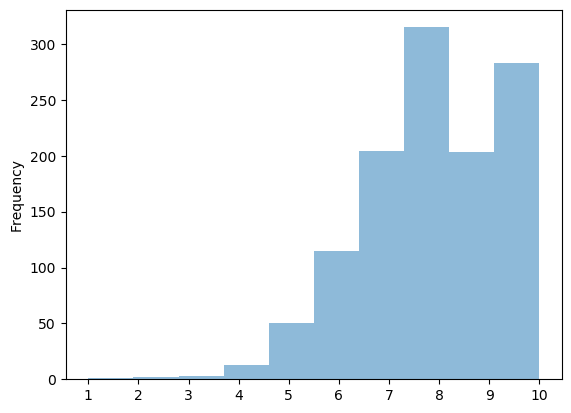

In [76]:
_= df_pleasure['experience'].plot.hist(bins=10, alpha= .5)
_= plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

In [87]:
np.sort(df_pleasure['experience'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [102]:
df.describe()

,experience,rides_per_week,activity_Commuting,activity_Chores/errands,activity_WorkingTool,activity_elseTransportation,activity_Mountain,activity_Touring,activity_Racing,activity_FitnessTraining,activity_PleasureRides,SH_usage,buyingREF_Brand,buyingREF_OnlineReviews,buyingREF_Influencer,buyingREF_Friend/family,buyingREF_Price,buyingREF_myNeeds
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,8.036618,6.490679,3.481358,3.418109,1.352197,3.137816,1.942743,3.138482,1.535952,3.250999,4.232357,3.069241,3.128495,3.848868,2.388815,3.661784,3.655792,4.403462
std,1.561313,7.357592,1.720081,1.391280,0.917186,1.492257,1.380621,1.445708,1.053391,1.388151,1.026597,1.706046,1.119210,0.941561,1.233264,1.090259,0.952239,0.782683
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,4.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,4.000000
50%,8.000000,5.000000,4.000000,4.000000,1.000000,3.000000,1.000000,3.000000,1.000000,3.000000,5.000000,3.000000,3.000000,4.000000,2.000000,4.000000,4.000000,5.000000
75%,9.000000,8.000000,5.000000,5.000000,1.000000,5.000000,3.000000,4.000000,2.000000,4.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.000000,5.000000
max,10.000000,104.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [104]:
df.iloc[:, 18:27].head(30)

,activity_Commuting,activity_Chores/errands,activity_WorkingTool,activity_elseTransportation,activity_Mountain,activity_Touring,activity_Racing,activity_FitnessTraining,activity_PleasureRides
0,4,2,1,1,2,3,1,4,1
1,5,4,1,3,1,1,1,1,2
2,5,5,1,3,1,3,1,2,5
3,5,5,1,4,1,1,1,1,4
4,5,5,1,5,1,3,1,3,5
5,5,4,1,1,1,3,1,1,2
6,4,4,1,5,3,4,3,2,3
7,5,5,1,5,2,5,1,4,4
8,1,3,1,3,1,4,3,5,3
9,2,5,1,4,1,1,1,3,3
